In [1]:
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [1]:
with open('./run0-8.pickle','rb') as f:
    agglom_res = pickle.load(f)
    
with open('./run9-12.pickle','rb') as f:
    agglom_res.extend(pickle.load(f))

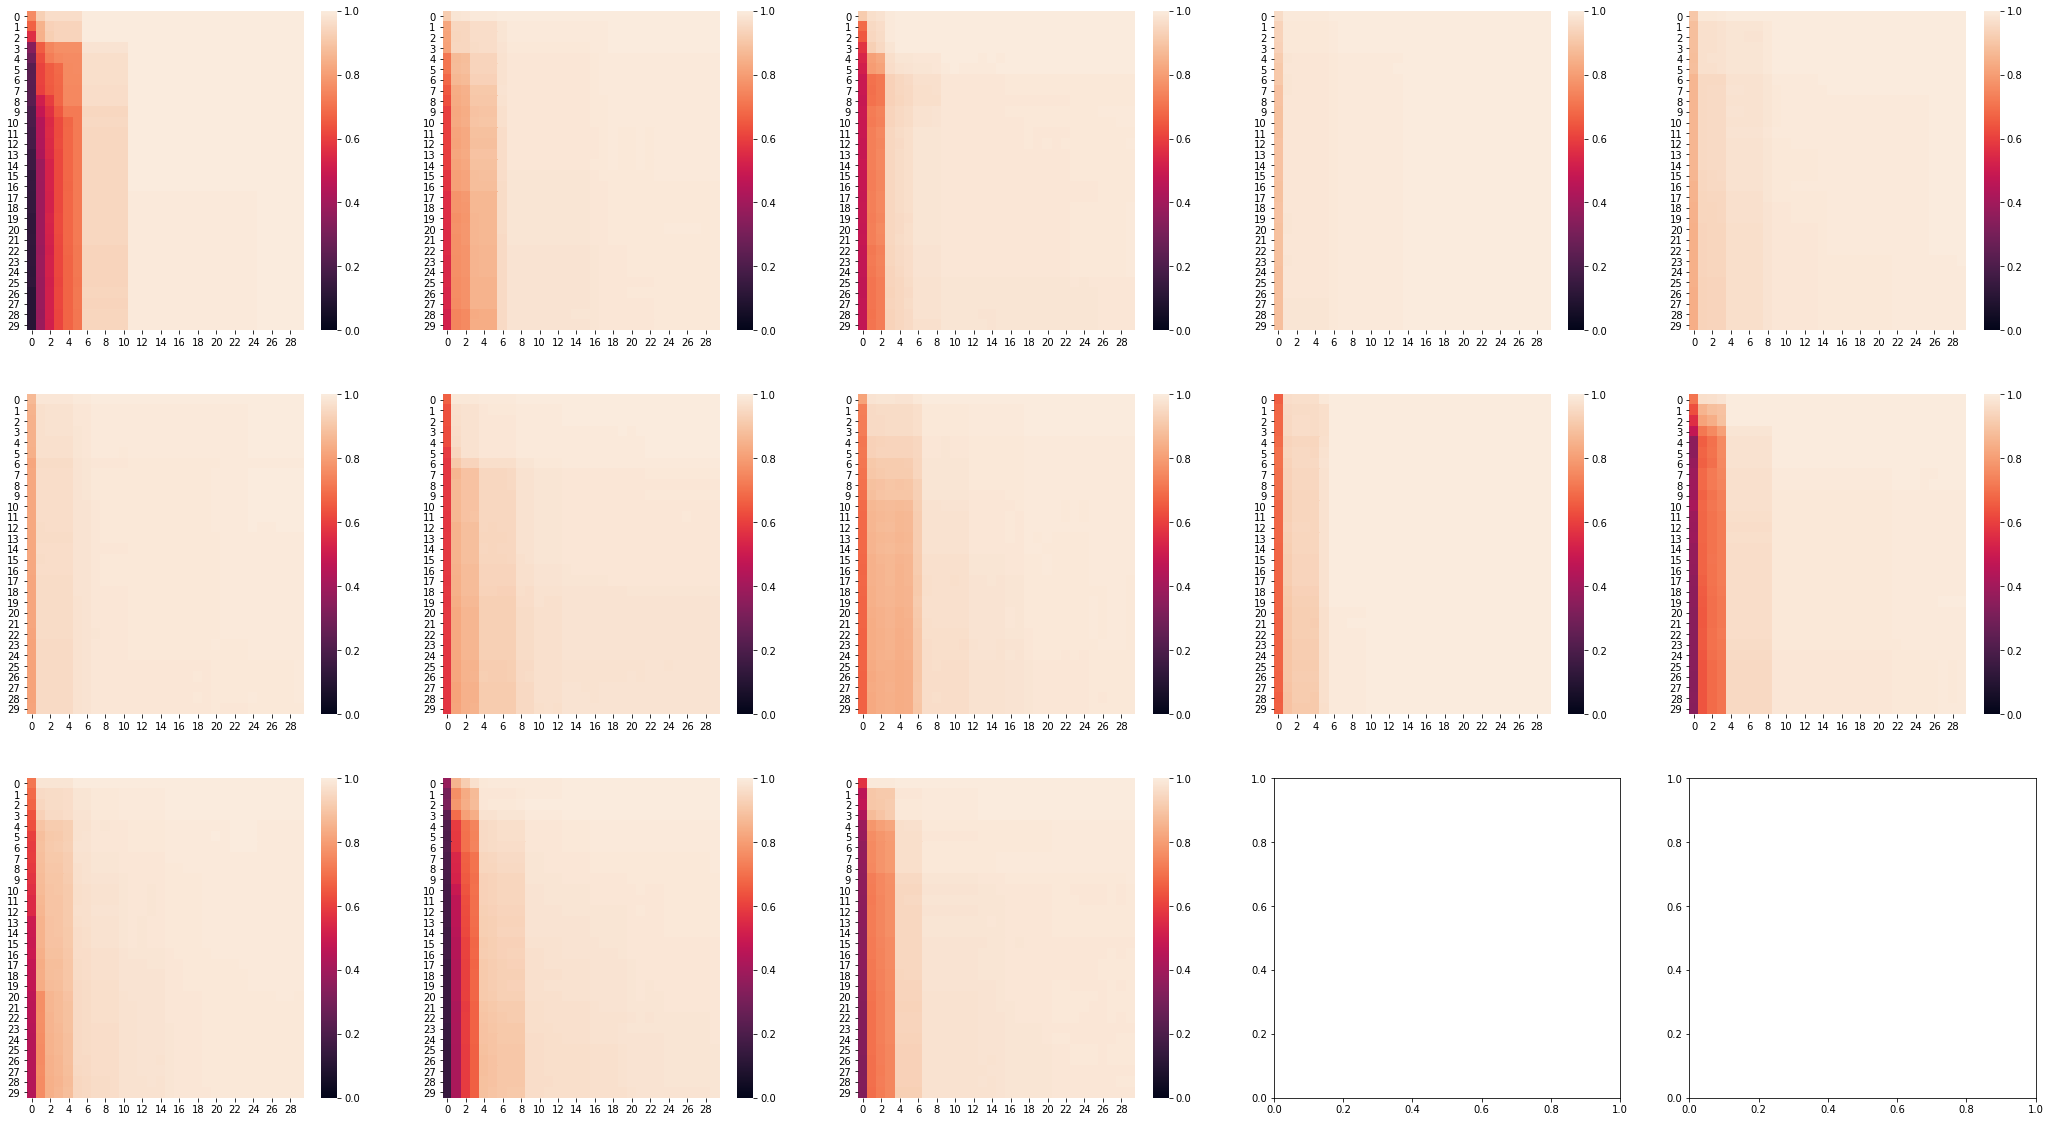

In [78]:
f,ax = plt.subplots(3,5,figsize=(36,20))
ax = ax.flatten()

for g in range(len(agglom_res)):
    sns.heatmap(agglom_res[g]['acc'].T,vmin=0,vmax=1,annot=False,ax=ax[g])

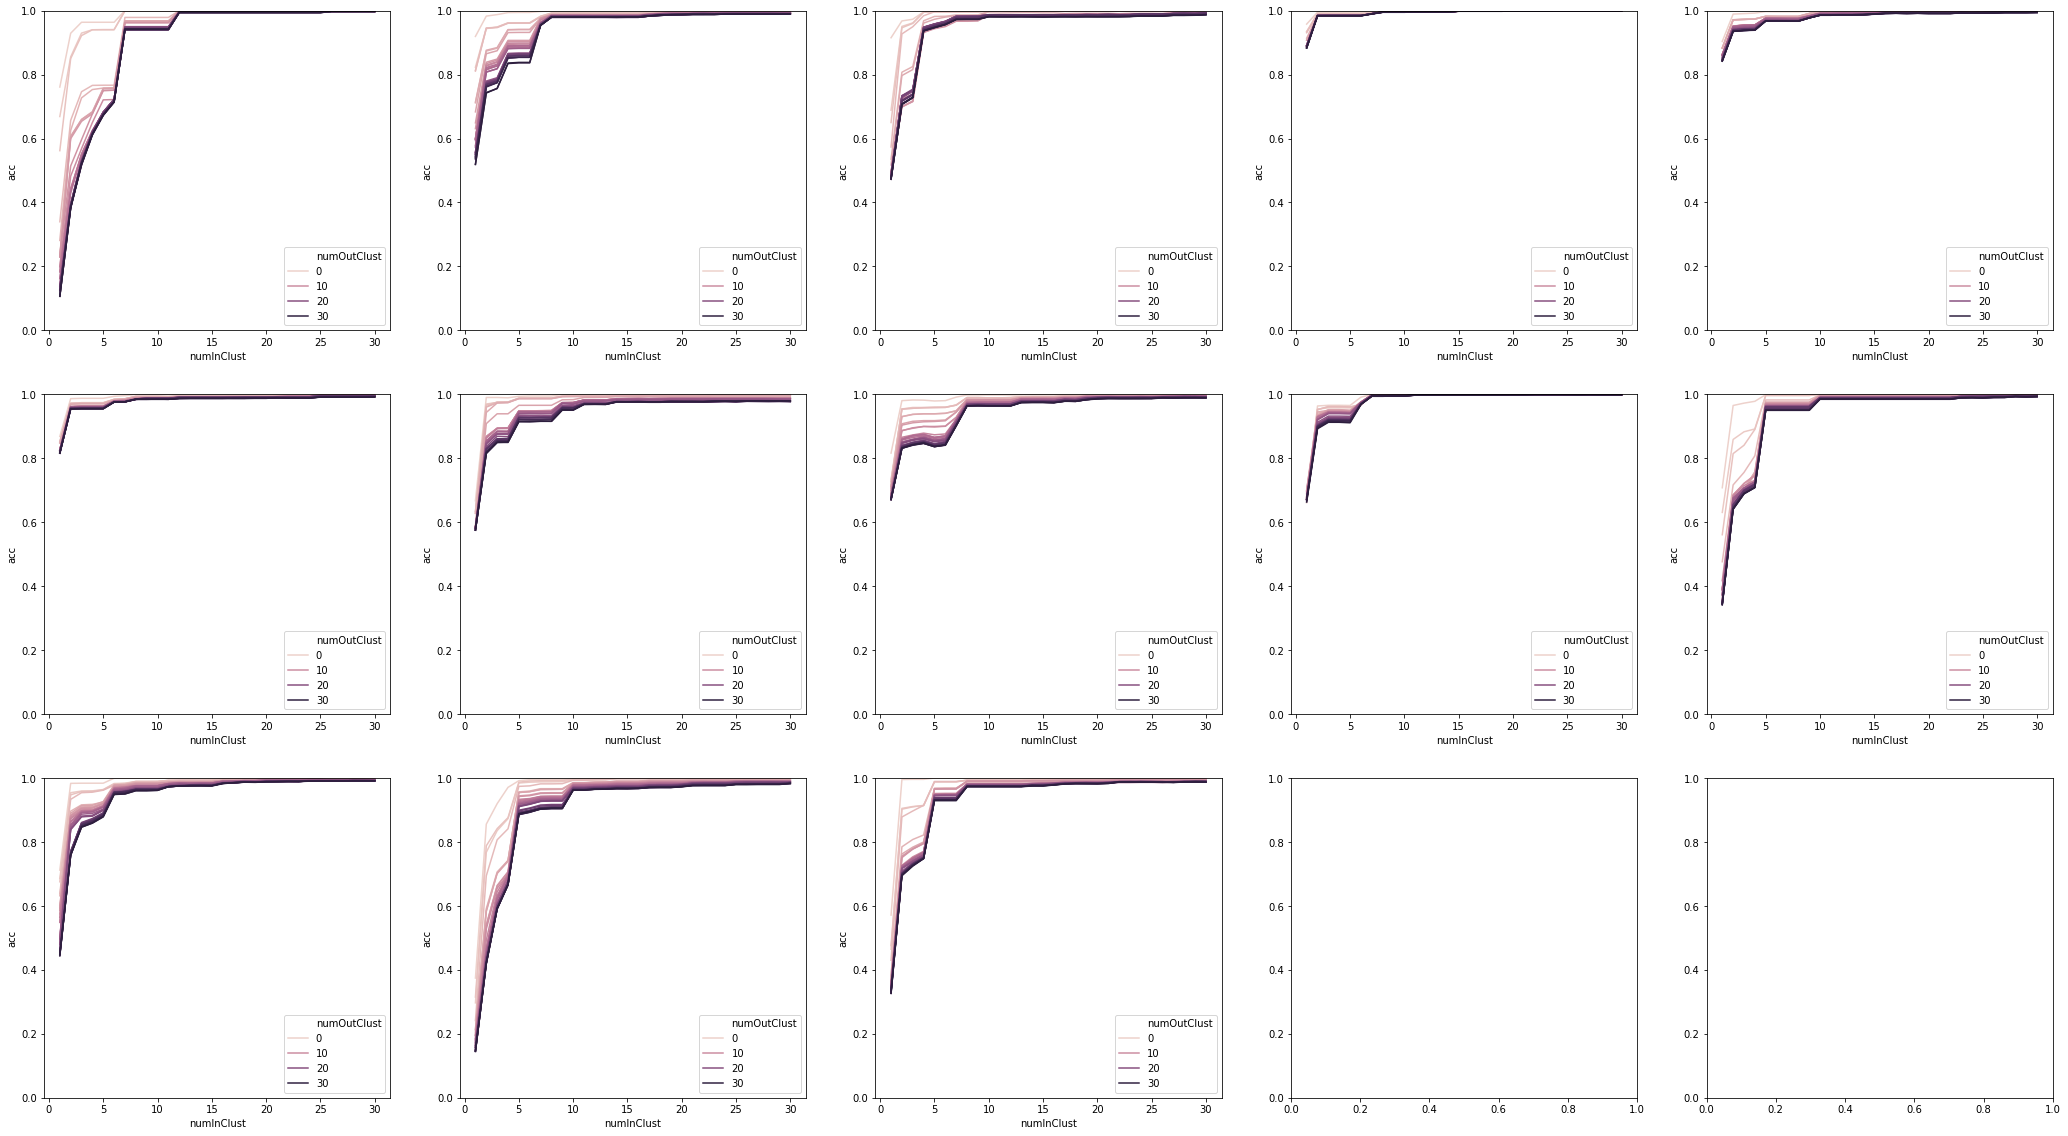

In [79]:
f,ax = plt.subplots(3,5,figsize=(36,20))
ax = ax.flatten()

for g in range(len(agglom_res)):
    temp = agglom_res[g]['acc'].flatten()
    numOutClust = np.tile(np.arange(1,31),[30,1]).flatten()
    numInClust = np.tile(np.arange(1,31),[30,1]).T.flatten()
    res = pd.DataFrame(data={'acc':temp,'numInClust':numInClust,'numOutClust':numOutClust})
    sns.lineplot(x='numInClust',y='acc',hue='numOutClust',data=res,ax=ax[g])
    ax[g].set(ylim=(0,1))
    ax[g].legend(loc='lower right')